In [1]:
#The book tutorial has been used to aid me in this process:
#https://nbviewer.org/github/mml-book/mml-book.github.io/blob/master/tutorials/tutorial_pca.ipynb

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

Text(0.5, 0.5, 'Z Label')

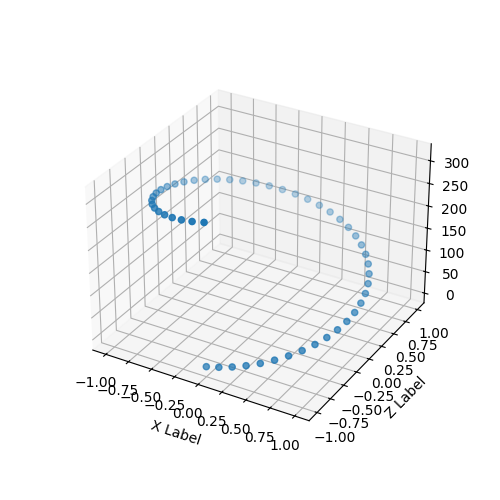

In [3]:
rng = np.random.RandomState(1)
theta = np.linspace(0, 100*np.pi)
x = np.cos(theta - np.pi/2)
y = np.sin(theta - np.pi/2)
z = theta

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
X = np.array(list(zip(x,y,z)))

ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_ylabel('Z Label')

Standardize the data 

Text(0.5, 0, 'Z Label')

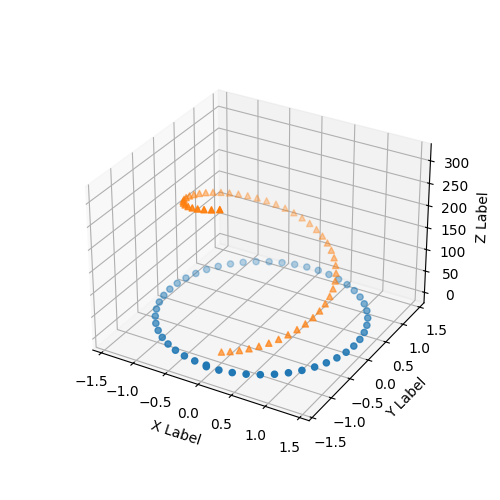

In [4]:
#Calculating the mean of the dataset X
mu = np.mean(X, axis=0)
#Calculating the standard diviation of the dataset X
std = np.std(X, axis=0)
#Standardizing the dataset
X_scaled = (X - mu) / std

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], marker='o')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [5]:
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')

Shape of X_scaled: (50, 3)
Shape of features: (3, 50)


In [6]:
cov_matrix =  np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print(cov_matrix)

Shape of cov_matrix: (3, 3)
[[ 1.02040816e+00  8.82674416e-16 -7.70956761e-01]
 [ 8.82674416e-16  1.02040816e+00 -3.75337812e-15]
 [-7.70956761e-01 -3.75337812e-15  1.02040816e+00]]


Find the Eigen decomposition. Use library functions

In [7]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

Sort the eigen values and the eigen vectors an print them 

In [8]:
# Sorting indices to ensure both eigenvalues and eigenvectors are sorted descending and aligning
sorted_indices = np.argsort(eig_values)[::-1]

sorted_eig_values = eig_values[sorted_indices]
sorted_eig_vectors = eig_vectors[:, sorted_indices]

print(f'Sorted Eigenvalues: {sorted_eig_values}')
print(f'Sorted Eigenvectors: {sorted_eig_vectors}')

Sorted Eigenvalues: [1.79136492 1.02040816 0.2494514 ]
Sorted Eigenvectors: [[-7.07106781e-01 -4.89619973e-15  7.07106781e-01]
 [-4.24718226e-15  1.00000000e+00  2.67708980e-15]
 [ 7.07106781e-01  1.11022302e-15  7.07106781e-01]]


Calculate the cumulative variance expressed by each eigen value

Eigenvalues upto 1 expresses 58.51792087449175 % variance
Eigenvalues upto 2 expresses 91.8512542078251 % variance
Eigenvalues upto 3 expresses 100.00000000000003 % variance


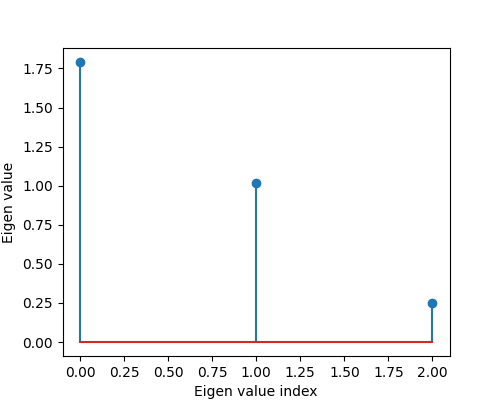

In [9]:
exp_var = 0
for i in range(len(sorted_eig_values)):
    exp_var += (sorted_eig_values[i]/sum(sorted_eig_values))*100
    print(f'Eigenvalues upto {i+1} expresses {exp_var} % variance')
    
plt.figure(figsize=(5,4))
plt.stem(sorted_eig_values)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

Choose a subset of vectors to use

In [10]:
# Reducing the number of dimentions by one, removing the last vector
reduced_eigen_space = sorted_eig_vectors[:, :len(sorted_eig_values)-1]
print(reduced_eigen_space)
print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')

[[-7.07106781e-01 -4.89619973e-15]
 [-4.24718226e-15  1.00000000e+00]
 [ 7.07106781e-01  1.11022302e-15]]
Shape of X_scaled: (50, 3)
Shape of reduced_eigen_space: (3, 2)


Transform the scaled data using the reduced eigen space

In [11]:
X_compressed = np.dot(X_scaled, reduced_eigen_space)
print(f'Shape of X_compressed: {X_compressed.shape}')

Shape of X_compressed: (50, 2)


To verify that we can indeed go back and forth among representations, get the reconstructed data using the transpose of the previous transformation

In [12]:
# Here I need to transpose reduced_eigen_space, to be able to reconstruct. To get back to (50,3), (50,2) must match (2,3)
X_reconstructed = np.dot(X_compressed, reduced_eigen_space.T)
print(f'Shape of X_reconstructed: {X_reconstructed.shape}')

Shape of X_reconstructed: (50, 3)


Reconstruct the data (i.e. reverse the standardization that you had used) to visualize it

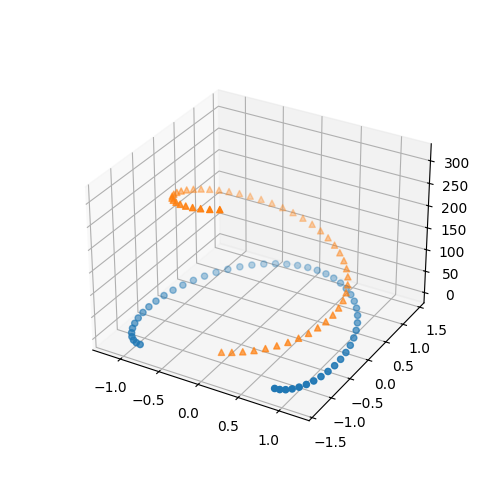

In [13]:
data_reconstructed = X_reconstructed
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_reconstructed[:,0], data_reconstructed[:,1], data_reconstructed[:,2], marker='o')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='^')

## The final result does not match the original X_scaled. This is probably because of how I reduced the dimentions